In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [2]:
#import data sources
df1 = pd.read_csv('Data/nba_draft_first_round_with_stats.csv')
df2 = pd.read_csv('Data/nba_draft_second_round_with_stats.csv')
df3 = pd.read_csv('Data/nba_draft_undrafted_with_stats.csv')
df4 = pd.read_csv('Data/nba_draft_withdrew_with_stats.csv')

In [3]:
#clean up dataframes before concat
df1.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Draft Trades', 'Nationality', 'Unnamed: 14', 'Class', 'Team'
          , 'Pos', 'YOS', 'Pre-Draft Team'], axis=1, inplace=True)
df1['draft_group'] = '1st round'

df2.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Draft Trades', 'Nationality', 'Unnamed: 14', 'Class', 'Team'
          , 'Pos', 'YOS', 'Pre-Draft Team'], axis=1, inplace=True)
df2['draft_group'] = '2nd round'

df3.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Nationality', 'Class', 'Pos', 'YOS', 'Pre-Draft Team'], axis=1, inplace=True)
df3[['Pick', 'draft_group']] = 'Not Drafted'
cols = [col for col in df1.columns]
cols
df3 = df3[cols]

df4.dropna(subset=['Birth Date'], inplace=True)
df4['Age'] = df4['Year'].astype(int) - df4['Birth Date'].str[-4:].astype(int)
df4['draft_year'] = df4['Year']
df4.drop(['Year', 'Draft Status', 'Unnamed: 0', 'Unnamed: 0.1', 'Class',
          'Pos', 'YOS', 'Pre-Draft Team', 'Birth Date'], axis=1, inplace=True)
df4[['Pick', 'draft_group']] = 'Not Drafted'
cols = [col for col in df1.columns]
cols
df4 = df4[cols]

In [4]:
#concat dataframes
df_list = [df1, df2, df3, df4]
df = pd.concat(df_list, ignore_index=True)

#remove NA in WT field
df['WT'] = df['WT'].apply(lambda x: x if x != '-' else np.nan)
df

Pick                 Player   HT   WT  Age  draft_year  points  \
0               1          Kenyon Martin  6-9  240   22        2000    11.0   
1               2         Stromile Swift  6-9  225   20        2000    13.4   
2               3           Darius Miles  6-9  210   18        2000     2.2   
3               4           Marcus Fizer  6-8  246   21        2000    18.9   
4               5            Mike Miller  6-8  218   20        2000    13.3   
...           ...                    ...  ...  ...  ...         ...     ...   
3177  Not Drafted         Raymond Wright  6-9  220   23        2008     NaN   
3178  Not Drafted  Justin Wright-Foreman  6-2  190   21        2018    18.6   
3179  Not Drafted            Jacob Young  6-2  185   24        2021     7.9   
3180  Not Drafted         Omer Yurtseven  7-0  265   19        2017    12.1   
3181  Not Drafted           Nick Zachery  6-3  205   24        2003    13.9   

      rebounds  assists  steals  blocks  draft_group  
0          7.5      1.2     1.1     2.5    1st round  
1          7.0      0.7     1.3     2.6    1st round  
2          0.9      0.2     0.2     0.2    1st round  
3          7.4      1.0     0.9     0.9    1st round  
4          6.0      2.3     1.2     0.3    1st round  
...        ...      ...     ...     ...          ...  
3177       NaN      NaN     NaN     NaN  Not Drafted  
3178       2.9      2.1     0.7     0.2  Not Drafted  
3179       1.8      1.7     0.9     0.0  Not Drafted  
3180       7.1      0.9     0.4     1.4  Not Drafted  
3181       2.7      2.6     1.4     0.1  Not Drafted  

[3182 rows x 12 columns]

Text(0, 0.5, 'Count')

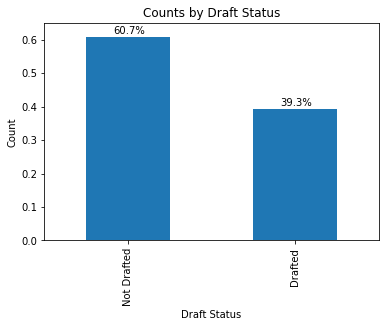

In [5]:
#convert draft_group to binary 0: Not Drafted and 1: Drafted
conditions = [
    df['draft_group'] == 'Not Drafted'
]
choices = [
    'Not Drafted'
]

df['drafted_yn'] = np.select(conditions, choices, 'Drafted')

#preview class distribution
ax = df['drafted_yn'].value_counts(normalize=True).plot(kind='bar')
ax.set_ylim([0,.65])

x_offset = -.09
y_offset = 0.01

for p in ax.patches:
    b = p.get_bbox()
    val = "{:.1%}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

plt.title("Counts by Draft Status")
plt.xlabel("Draft Status")
plt.ylabel("Count")

In [6]:
#preview duplicate
df[df['Player'] == 'Danny Green']

Pick       Player   HT   WT  Age  draft_year  points  rebounds  \
904            46  Danny Green  6-6  215   22        2009     9.4       4.1   
2689  Not Drafted  Danny Green  6-6  215   21        2008     9.4       4.1   

      assists  steals  blocks  draft_group   drafted_yn  
904       1.8     1.1     1.1    2nd round      Drafted  
2689      1.8     1.1     1.1  Not Drafted  Not Drafted

In [7]:
#drop duplicate
df.drop_duplicates(['Player', 'points', 'rebounds', 'assists', 'steals', 'blocks'], inplace=True)

In [8]:
#preview data error
df[df['Player'] == 'Justin Jackson']

Pick          Player   HT   WT  Age  draft_year  points  rebounds  \
517   15  Justin Jackson  6-8  210   22        2017     0.0       0.5   

     assists  steals  blocks draft_group drafted_yn  
517      0.0     0.0     0.0   1st round    Drafted

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2899 entries, 0 to 3181
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pick         2899 non-null   object 
 1   Player       2899 non-null   object 
 2   HT           2899 non-null   object 
 3   WT           2898 non-null   object 
 4   Age          2899 non-null   int64  
 5   draft_year   2899 non-null   int64  
 6   points       2320 non-null   float64
 7   rebounds     2320 non-null   float64
 8   assists      2320 non-null   float64
 9   steals       2319 non-null   float64
 10  blocks       2319 non-null   float64
 11  draft_group  2899 non-null   object 
 12  drafted_yn   2899 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 317.1+ KB


In [10]:
#drop nulls due to timing
df.dropna(inplace=True)
df

Pick          Player   HT   WT  Age  draft_year  points  \
0               1   Kenyon Martin  6-9  240   22        2000    11.0   
1               2  Stromile Swift  6-9  225   20        2000    13.4   
2               3    Darius Miles  6-9  210   18        2000     2.2   
3               4    Marcus Fizer  6-8  246   21        2000    18.9   
4               5     Mike Miller  6-8  218   20        2000    13.3   
...           ...             ...  ...  ...  ...         ...     ...   
3171  Not Drafted     Isaiah Wong  6-3  180   20        2021    12.1   
3172  Not Drafted    Brandon Wood  6-2  190   22        2011    13.6   
3174  Not Drafted   Holland Woods  6-1  180   21        2019    12.7   
3179  Not Drafted     Jacob Young  6-2  185   24        2021     7.9   
3181  Not Drafted    Nick Zachery  6-3  205   24        2003    13.9   

      rebounds  assists  steals  blocks  draft_group   drafted_yn  
0          7.5      1.2     1.1     2.5    1st round      Drafted  
1          7.0      0.7     1.3     2.6    1st round      Drafted  
2          0.9      0.2     0.2     0.2    1st round      Drafted  
3          7.4      1.0     0.9     0.9    1st round      Drafted  
4          6.0      2.3     1.2     0.3    1st round      Drafted  
...        ...      ...     ...     ...          ...          ...  
3171       3.8      1.7     0.8     0.4  Not Drafted  Not Drafted  
3172       3.7      2.3     1.1     0.2  Not Drafted  Not Drafted  
3174       2.6      4.7     1.6     0.1  Not Drafted  Not Drafted  
3179       1.8      1.7     0.9     0.0  Not Drafted  Not Drafted  
3181       2.7      2.6     1.4     0.1  Not Drafted  Not Drafted  

[2318 rows x 13 columns]

In [11]:
#preview Pick field
df['Pick'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17, 18, 19, 20, 21, 22,
       26, 28, 29, 13, 15, 16, 23, 25, 27, 24, 30, 31, 32, 33, 34, 35, 37,
       38, 39, 40, 41, 43, 44, 45, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58,
       36, 42, 46, 51, 47, 59, 60, 'Not Drafted'], dtype=object)

In [12]:
#convert height to inches
def height_in_inches(height):
    inches = int(height.split('-')[0])*12 + int(height.split('-')[1])
    return inches

df['HT'] = df['HT'].apply(height_in_inches)
df[['WT', 'HT']] = df[['WT', 'HT']].astype(int)
df

Pick          Player  HT   WT  Age  draft_year  points  rebounds  \
0               1   Kenyon Martin  81  240   22        2000    11.0       7.5   
1               2  Stromile Swift  81  225   20        2000    13.4       7.0   
2               3    Darius Miles  81  210   18        2000     2.2       0.9   
3               4    Marcus Fizer  80  246   21        2000    18.9       7.4   
4               5     Mike Miller  80  218   20        2000    13.3       6.0   
...           ...             ...  ..  ...  ...         ...     ...       ...   
3171  Not Drafted     Isaiah Wong  75  180   20        2021    12.1       3.8   
3172  Not Drafted    Brandon Wood  74  190   22        2011    13.6       3.7   
3174  Not Drafted   Holland Woods  73  180   21        2019    12.7       2.6   
3179  Not Drafted     Jacob Young  74  185   24        2021     7.9       1.8   
3181  Not Drafted    Nick Zachery  75  205   24        2003    13.9       2.7   

      assists  steals  blocks  draft_group   drafted_yn  
0         1.2     1.1     2.5    1st round      Drafted  
1         0.7     1.3     2.6    1st round      Drafted  
2         0.2     0.2     0.2    1st round      Drafted  
3         1.0     0.9     0.9    1st round      Drafted  
4         2.3     1.2     0.3    1st round      Drafted  
...       ...     ...     ...          ...          ...  
3171      1.7     0.8     0.4  Not Drafted  Not Drafted  
3172      2.3     1.1     0.2  Not Drafted  Not Drafted  
3174      4.7     1.6     0.1  Not Drafted  Not Drafted  
3179      1.7     0.9     0.0  Not Drafted  Not Drafted  
3181      2.6     1.4     0.1  Not Drafted  Not Drafted  

[2318 rows x 13 columns]

In [13]:
#preview distribution of data by year
df['draft_year'].value_counts().sort_index(ascending=False)

2021     68
2020    148
2019    172
2018    160
2017    149
2016    126
2015     98
2014    106
2013     85
2012     88
2011    114
2010    114
2009     95
2008     97
2007    103
2006    104
2005    109
2004     78
2003     79
2002     74
2001     69
2000     71
1999      2
1998      2
1996      5
1995      2
Name: draft_year, dtype: int64

In [14]:
#let's hold out the 2020 draft for ranking at the end
df_2020_draft = df[df['draft_year'] == 2020].reset_index(drop=True)
df = df[df['draft_year'] != 2020].reset_index(drop=True)
df['draft_year'].value_counts().sort_index(ascending=False)

2021     68
2019    172
2018    160
2017    149
2016    126
2015     98
2014    106
2013     85
2012     88
2011    114
2010    114
2009     95
2008     97
2007    103
2006    104
2005    109
2004     78
2003     79
2002     74
2001     69
2000     71
1999      2
1998      2
1996      5
1995      2
Name: draft_year, dtype: int64

In [15]:
#let's narrow our data to 80 so our data isn't too old. Full data can be used if statistics are adjusted for game pace/D1-D3
threshold = 80
list_of_years = []
for key in df.groupby('draft_year').size().keys():
    if df.groupby('draft_year').size()[key] >= threshold:
        list_of_years.append(key)

df = df[df['draft_year'].isin(list_of_years)]
df['draft_year'].value_counts().sort_index(ascending=False)

2019    172
2018    160
2017    149
2016    126
2015     98
2014    106
2013     85
2012     88
2011    114
2010    114
2009     95
2008     97
2007    103
2006    104
2005    109
Name: draft_year, dtype: int64

In [16]:
df.reset_index(drop=True, inplace=True)
df

Pick            Player  HT   WT  Age  draft_year  points  \
0               1      Andrew Bogut  84  260   20        2005    16.6   
1               2   Marvin Williams  81  237   19        2005    11.3   
2               3    Deron Williams  75  200   21        2005    11.0   
3               4        Chris Paul  72  175   20        2005    15.0   
4               5    Raymond Felton  73  205   21        2005    12.5   
...           ...               ...  ..  ...  ...         ...     ...   
1715  Not Drafted  Christian Wilson  74  170   23        2017    10.5   
1716  Not Drafted    Alec Wintering  71  170   21        2016    14.1   
1717  Not Drafted          Nic Wise  70  180   22        2009    11.2   
1718  Not Drafted      Brandon Wood  74  190   22        2011    13.6   
1719  Not Drafted     Holland Woods  73  180   21        2019    12.7   

      rebounds  assists  steals  blocks  draft_group   drafted_yn  
0         11.1      2.3     0.7     1.6    1st round      Drafted  
1          6.6      0.7     1.1     0.5    1st round      Drafted  
2          3.3      5.9     1.1     0.2    1st round      Drafted  
3          3.9      6.3     2.5     0.2    1st round      Drafted  
4          4.1      6.9     1.9     0.3    1st round      Drafted  
...        ...      ...     ...     ...          ...          ...  
1715       2.9      3.0     1.1     0.1  Not Drafted  Not Drafted  
1716       3.1      5.2     1.6     0.0  Not Drafted  Not Drafted  
1717       2.3      3.4     1.5     0.1  Not Drafted  Not Drafted  
1718       3.7      2.3     1.1     0.2  Not Drafted  Not Drafted  
1719       2.6      4.7     1.6     0.1  Not Drafted  Not Drafted  

[1720 rows x 13 columns]

In [17]:
#preview class distribution in modeling dataframe
display(len(df[df['draft_group'] == 'Not Drafted'])/len(df), df)

0.6075581395348837

Pick            Player  HT   WT  Age  draft_year  points  \
0               1      Andrew Bogut  84  260   20        2005    16.6   
1               2   Marvin Williams  81  237   19        2005    11.3   
2               3    Deron Williams  75  200   21        2005    11.0   
3               4        Chris Paul  72  175   20        2005    15.0   
4               5    Raymond Felton  73  205   21        2005    12.5   
...           ...               ...  ..  ...  ...         ...     ...   
1715  Not Drafted  Christian Wilson  74  170   23        2017    10.5   
1716  Not Drafted    Alec Wintering  71  170   21        2016    14.1   
1717  Not Drafted          Nic Wise  70  180   22        2009    11.2   
1718  Not Drafted      Brandon Wood  74  190   22        2011    13.6   
1719  Not Drafted     Holland Woods  73  180   21        2019    12.7   

      rebounds  assists  steals  blocks  draft_group   drafted_yn  
0         11.1      2.3     0.7     1.6    1st round      Drafted  
1          6.6      0.7     1.1     0.5    1st round      Drafted  
2          3.3      5.9     1.1     0.2    1st round      Drafted  
3          3.9      6.3     2.5     0.2    1st round      Drafted  
4          4.1      6.9     1.9     0.3    1st round      Drafted  
...        ...      ...     ...     ...          ...          ...  
1715       2.9      3.0     1.1     0.1  Not Drafted  Not Drafted  
1716       3.1      5.2     1.6     0.0  Not Drafted  Not Drafted  
1717       2.3      3.4     1.5     0.1  Not Drafted  Not Drafted  
1718       3.7      2.3     1.1     0.2  Not Drafted  Not Drafted  
1719       2.6      4.7     1.6     0.1  Not Drafted  Not Drafted  

[1720 rows x 13 columns]

In [18]:
#list of full continuous variables
X = df[['HT', 'WT', 'Age', 'points', 'rebounds', 'assists', 'steals', 'blocks']]

from sklearn.preprocessing import StandardScaler

#standard scale continuous variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data

array([[ 1.66138168,  1.72472118, -1.27108611, ...,  0.27659287,
        -0.47265235,  1.3776406 ],
       [ 0.78972642,  0.83362988, -2.03765978, ..., -0.88890029,
         0.33066982, -0.25080874],
       [-0.9535841 , -0.59986482, -0.50451244, ...,  2.89895248,
         0.33066982, -0.69493129],
       ...,
       [-2.40634287, -1.37472682,  0.26206123, ...,  1.07786942,
         1.13399199, -0.84297214],
       [-1.24413585, -0.98729582,  0.26206123, ...,  0.27659287,
         0.33066982, -0.69493129],
       [-1.53468761, -1.37472682, -0.50451244, ...,  2.02483261,
         1.33482254, -0.84297214]])

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data = components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8'])

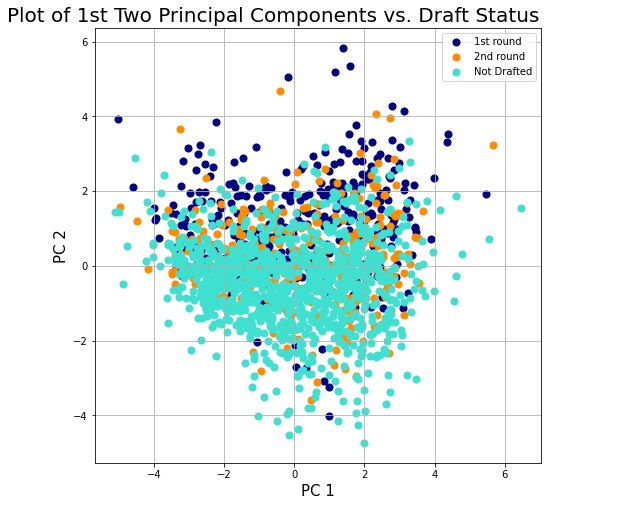

In [20]:
for_visual = pd.concat([pca_df, df[['draft_group', 'Player']]], axis = 1)
# print(for_visual)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot of 1st Two Principal Components vs. Draft Status              ', fontsize = 20)
W_GROUP = ['1st round','2nd round', 'Not Drafted']
colors = ['navy', 'darkorange', 'turquoise']
for WINS_GROUP, color in zip(W_GROUP,colors):
    indicesToKeep = for_visual['draft_group'] == WINS_GROUP
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)

ax.legend(W_GROUP)
ax.grid()

In [21]:
display(for_visual[for_visual['PC 2'] < -4])

display(df[df['Player'] == 'Justin Jackson'])

#this is an error due to web-scraping

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7  \
303   0.986920 -4.016676  1.170095  0.105555  0.058985 -0.190488  0.133122   
701  -0.139698 -4.518245  0.567301  0.130968 -0.611340 -0.117821  0.232002   
775   1.828703 -4.267982 -2.015411  0.310594  0.701734  0.326175 -0.405412   
1010  1.988389 -4.741532 -0.992516 -0.140716  1.295561  0.321051 -0.540109   
1379  1.246332 -4.145841  0.409040  0.057524  0.661563 -0.011434 -0.307102   
1423 -0.479293 -4.148967  0.430626  0.104033 -0.664683 -0.262458  0.012789   
1442 -1.030879 -4.009057  1.994429  0.363493 -1.406026 -0.535452  0.529557   
1609  0.111817 -4.358397  0.492554  0.077771 -0.577642 -0.226035  0.400033   

          PC 8  draft_group              Player  
303  -0.359571    1st round      Justin Jackson  
701   0.853406  Not Drafted         Kyle Bailey  
775  -0.208127  Not Drafted       Aaron Pettway  
1010 -0.345916  Not Drafted          Phil Jones  
1379 -0.310941  Not Drafted  Johnathan Williams  
1423  0.686633  Not Drafted         Jalen Adams  
1442  1.087468  Not Drafted        Jared Harper  
1609  0.659069  Not Drafted         James Lewis

Pick          Player  HT   WT  Age  draft_year  points  rebounds  assists  \
303   15  Justin Jackson  80  210   22        2017     0.0       0.5      0.0   

     steals  blocks draft_group drafted_yn  
303     0.0     0.0   1st round    Drafted

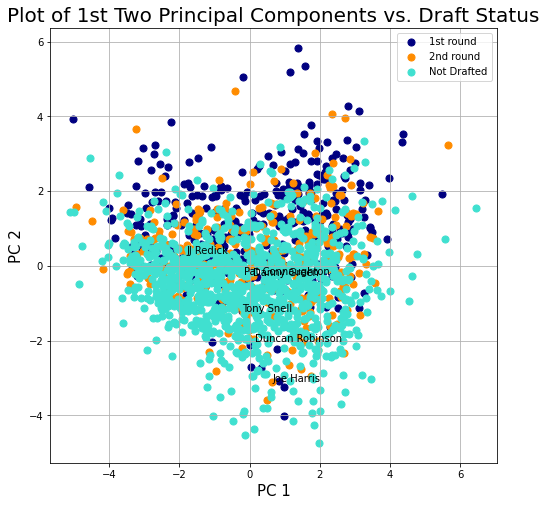

In [22]:
for_visual = pd.concat([pca_df, df[['draft_group', 'Player']]], axis = 1)
# print(for_visual)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot of 1st Two Principal Components vs. Draft Status', fontsize = 20)
W_GROUP = ['1st round','2nd round', 'Not Drafted']
colors = ['navy', 'darkorange', 'turquoise']
for WINS_GROUP, color in zip(W_GROUP,colors):
    indicesToKeep = for_visual['draft_group'] == WINS_GROUP
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)

threshold = 1
df_temp = df[df['draft_group'] == '1st round']
df_temp = df_temp[df_temp['Pick'].astype(int) <= threshold]

specialist_list = ['Duncan Robinson', 'Joe Harris', 'JJ Redick', 'Tony Snell','Danny Green','Pat Connaughton']
                            
for specialist in specialist_list:
        ax.text(for_visual['PC 1'][for_visual['Player']==specialist],
        for_visual['PC 2'][for_visual['Player']==specialist],
         specialist, color='black');

ax.legend(W_GROUP)
ax.grid()

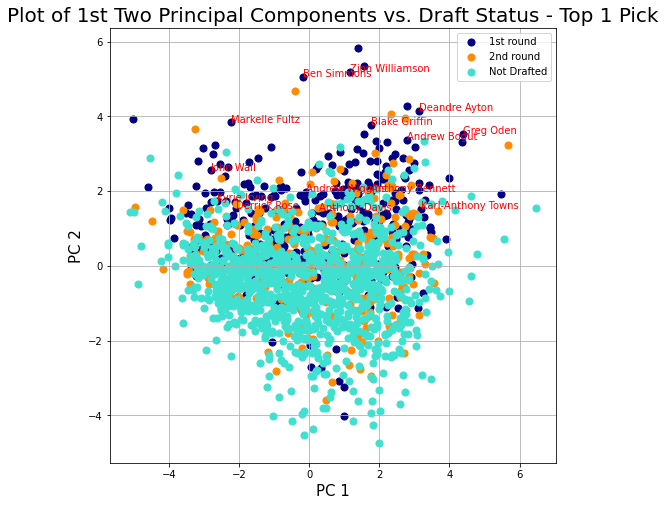

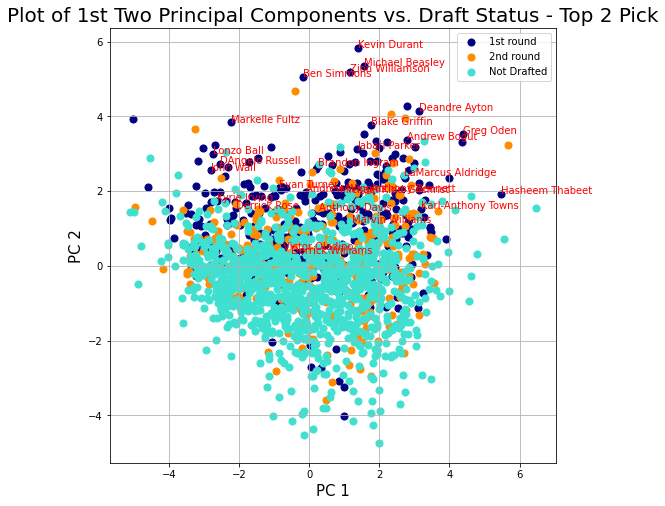

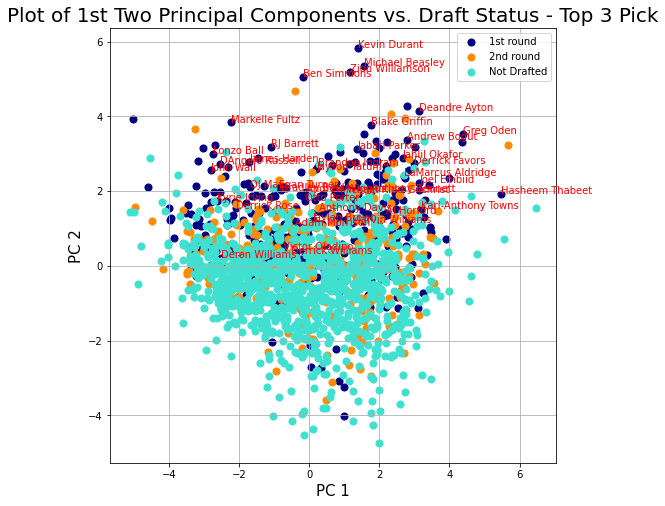

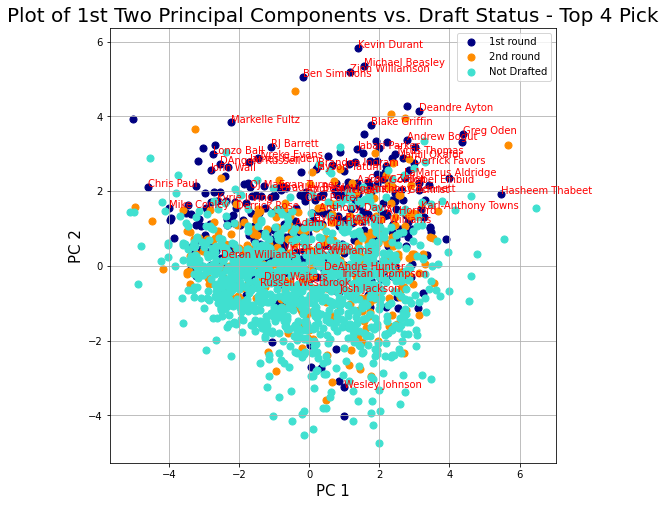

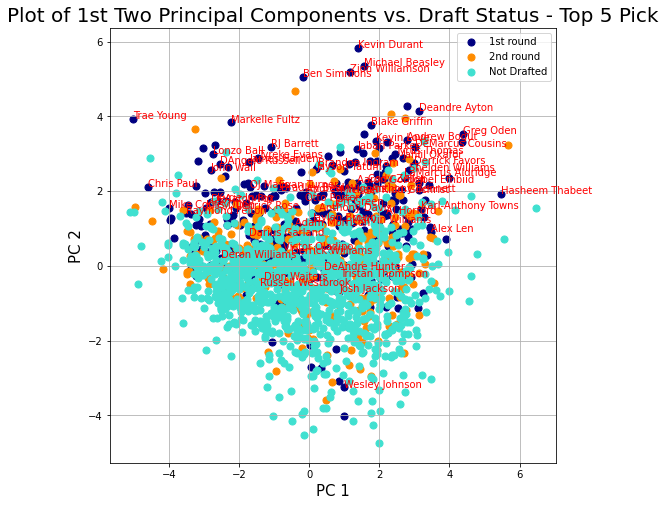

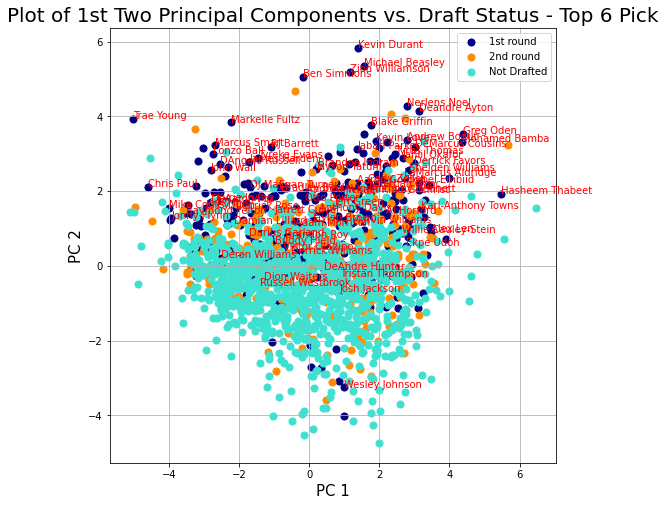

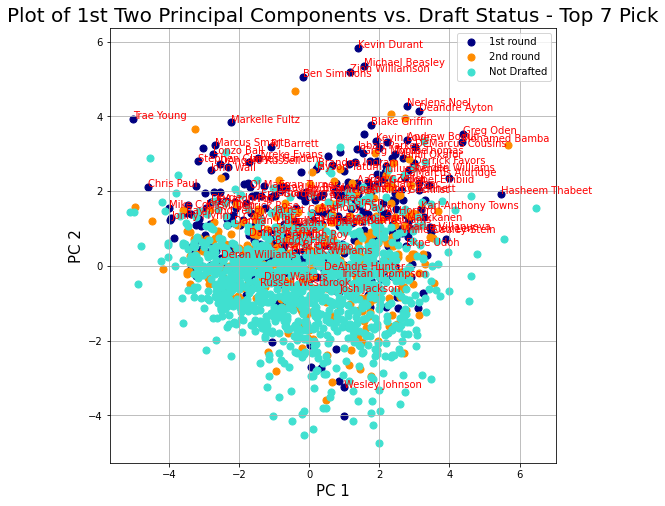

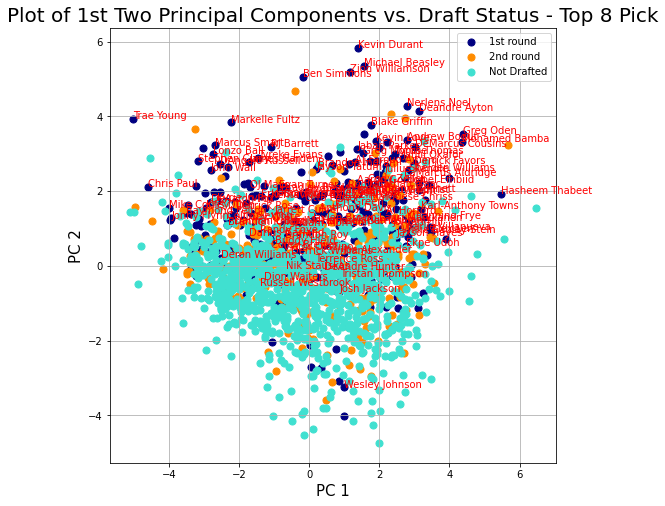

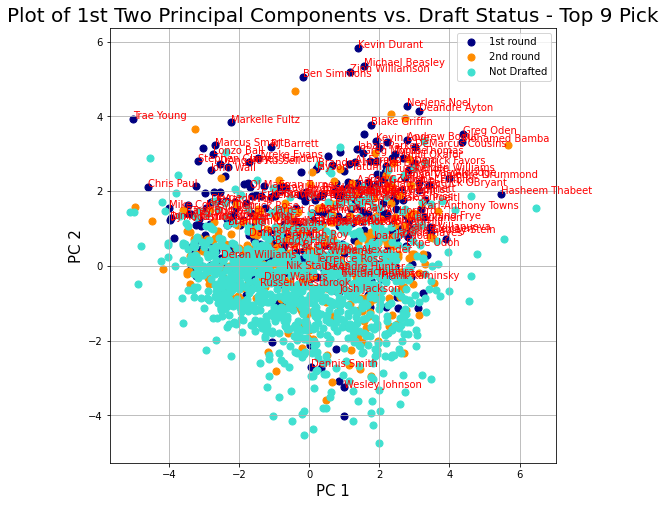

In [23]:
for_visual = pd.concat([pca_df, df[['draft_group', 'Player']]], axis = 1)
# print(for_visual)

for x in range(1,10):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('PC 1', fontsize = 15)
    ax.set_ylabel('PC 2', fontsize = 15)
    ax.set_title('Plot of 1st Two Principal Components vs. Draft Status - Top {} Pick'.format(x), fontsize = 20)
    W_GROUP = ['1st round','2nd round', 'Not Drafted']
    colors = ['navy', 'darkorange', 'turquoise']
    for WINS_GROUP, color in zip(W_GROUP,colors):
        indicesToKeep = for_visual['draft_group'] == WINS_GROUP
        ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
                   , for_visual.loc[indicesToKeep, 'PC 2']
                   , c = color
                   , s = 50)
    ax.legend(W_GROUP)
    ax.grid()

    threshold = x
    df_temp = df[df['draft_group'] == '1st round']
    df_temp = df_temp[df_temp['Pick'].astype(int) <= threshold]

    noteable_player_list = [player for player in df_temp['Player']]

    for player in noteable_player_list:
        ax.text(for_visual['PC 1'][for_visual['Player']==player],
            for_visual['PC 2'][for_visual['Player']==player],
             player, color='red');


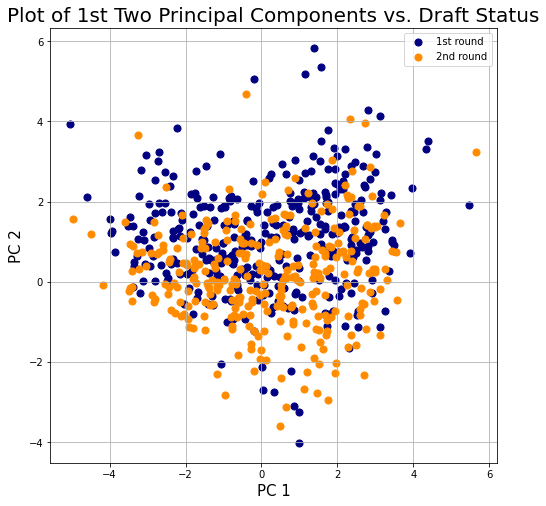

In [24]:
for_visual = pd.concat([pca_df, df[['draft_group', 'Player']]], axis = 1)
# print(for_visual)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot of 1st Two Principal Components vs. Draft Status', fontsize = 20)
draft_group = ['1st round','2nd round']
colors = ['navy', 'darkorange']
for draft_group, color in zip(draft_group,colors):
    indicesToKeep = for_visual['draft_group'] == draft_group
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
    
ax.legend(W_GROUP)
ax.grid()

In [25]:
import plotly.express as px

for_visual = pd.concat([pca_df, df[['draft_group', 'Player']]], axis = 1)
px.scatter(for_visual,x='PC 1', y='PC 2', color='draft_group', text='Player')

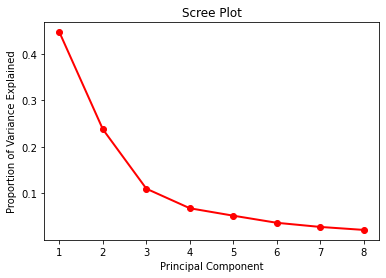

In [26]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [27]:
pca.explained_variance_ratio_[:2].sum() * 100

68.39915842118947

In [28]:
total_var = pca.explained_variance_ratio_[:3].sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['draft_group'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [29]:
X = df[['HT', 'WT', 'Age', 'points', 'rebounds', 'assists', 'steals', 'blocks']]

loadings = pd.DataFrame(pca.components_.T, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8']
                        , index = X.columns)
loadings

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6  \
HT        0.486615  0.061118 -0.031756  0.004123  0.256424  0.013195   
WT        0.452344  0.100439 -0.032543 -0.092517  0.654621  0.161382   
Age      -0.025140 -0.348381 -0.930992 -0.059434 -0.006554  0.086644   
points   -0.191232  0.555888 -0.142388 -0.595563 -0.198907  0.157280   
rebounds  0.269060  0.541512 -0.230823 -0.123298 -0.055754 -0.206974   
assists  -0.426461  0.233840 -0.031679  0.249358  0.335292  0.703261   
steals   -0.355666  0.360577 -0.205545  0.448247  0.324208 -0.569615   
blocks    0.375005  0.279039 -0.119920  0.595725 -0.495450  0.282246   

              PC 7      PC 8  
HT       -0.071966 -0.829059  
WT       -0.263605  0.501615  
Age      -0.012192 -0.004663  
points   -0.455366 -0.088262  
rebounds  0.710351  0.123872  
assists   0.271776 -0.139313  
steals   -0.259493 -0.058338  
blocks   -0.268383  0.122784

## Modeling

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score

#convert draft_group to binary 0: Not Drafted and 1: Drafted
conditions = [
    df['draft_group'] == 'Not Drafted'
]
choices = [
    0
]

y = np.select(conditions, choices, 1)
X = df[['HT', 'WT', 'Age', 'points', 'rebounds', 'assists', 'steals', 'blocks']]

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 7, stratify=y) 
#class imbalance may change year over year... but we will assume consistent % for now

#scale our train/test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#pca on scaled data
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

('DC', 0.6075573122529645, 0.000569169960474314)
('LR', 0.7492384716732543, 0.02822850310661075)
('LDA', 0.7434176548089593, 0.033464392220467355)
('KNN', 0.6932964426877471, 0.028395380159419874)
('DT', 0.6554993412384716, 0.02046479618562671)
('ETC', 0.695459815546772, 0.03074559745378682)
('RFC', 0.7208985507246377, 0.02818603332441812)
('NB', 0.7332490118577075, 0.028403882595265953)
('SVM', 0.7390566534914361, 0.031249231277464772)
('PAC', 0.6808906455862977, 0.05855407444206406)
('ADA', 0.7165559947299078, 0.015487741261209378)
('XGB', 0.6991119894598156, 0.03103071251591532)


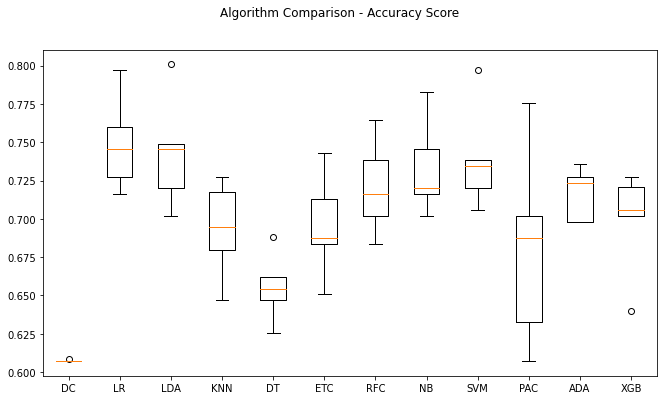

In [31]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier

#list of models to explore
models = []
models.append(('DC', DummyClassifier(strategy='most_frequent')))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('PAC', PassiveAggressiveClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('XGB', XGBClassifier()))

results = []
names = []

#stratisfied kfold cross-validation so that class distribution is maintained - PCA
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print((name, cv_results.mean(), cv_results.std()))

fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison - Accuracy Score')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

model_plot = fig

('DC', 0.6075573122529645, 0.000569169960474314)
('LR', 0.7506851119894599, 0.03082215815389516)
('LDA', 0.7528642951251647, 0.03317102720286528)
('KNN', 0.6976548089591568, 0.016808174077291477)
('DT', 0.6475335968379446, 0.02161530816273403)
('ETC', 0.7303583662714097, 0.020720432404382445)
('RFC', 0.7412727272727272, 0.014721659985452464)
('NB', 0.7318023715415019, 0.022753998378039354)
('SVM', 0.749973649538867, 0.01958420091983432)
('PAC', 0.6351725955204216, 0.04307502200499253)
('ADA', 0.7245322793148881, 0.024356334316396396)
('XGB', 0.7143847167325428, 0.03396274166443866)


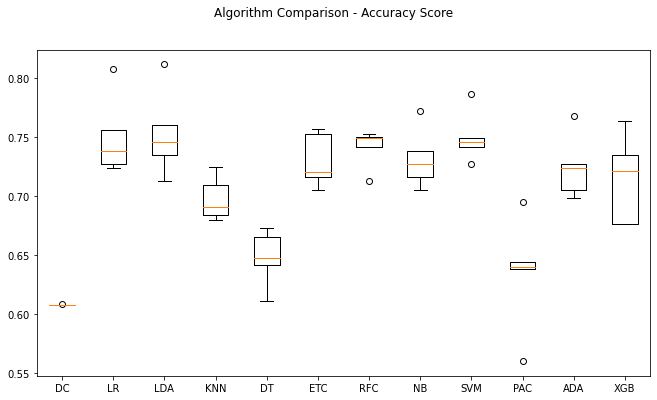

In [32]:
#evaluate on no PCA result
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print((name, cv_results.mean(), cv_results.std()))

fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison - Accuracy Score')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

model_plot = fig

In [33]:
from sklearn.metrics import accuracy_score

#LR results - PCA
lr = LogisticRegression()
lr_pca = lr.fit(X_train_pca,  y_train)
y_pred = lr_pca.predict(X_test_pca)
y_pred_train = lr_pca.predict(X_train_pca)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("LR_PCA Train Set Accuracy: %.2f%%" % (accuracy_train * 100))
print("LR_PCA Test Set Accuracy: %.2f%%" % (accuracy_test * 100))

#SVC results - PCA
svc = SVC()
svc_pca = svc.fit(X_train_pca,  y_train)
y_pred = svc_pca.predict(X_test_pca)
y_pred_train = svc_pca.predict(X_train_pca)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("SVC_PCA Train Set Accuracy: %.2f%%" % (accuracy_train * 100))
print("SVC_PCA Test Set Accuracy: %.2f%%" % (accuracy_test * 100))

#RF results - PCA
rf = RandomForestClassifier()
rf.fit(X_train_pca,  y_train)
y_pred = rf.predict(X_test_pca)
y_pred_train = rf.predict(X_train_pca)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("RF_PCA Train Set Accuracy: %.2f%%" % (accuracy_train * 100))
print("RF_PCA Test Set Accuracy: %.2f%%" % (accuracy_test * 100))

LR_PCA Train Set Accuracy: 74.85%
LR_PCA Test Set Accuracy: 76.74%
SVC_PCA Train Set Accuracy: 74.56%
SVC_PCA Test Set Accuracy: 75.29%
RF_PCA Train Set Accuracy: 100.00%
RF_PCA Test Set Accuracy: 75.58%


In [34]:
#LR results - no PCA
lr.fit(X_train_scaled,  y_train)
y_pred = lr.predict(X_test_scaled)
y_pred_train = lr.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("LR Train Set Accuracy: %.2f%%" % (accuracy_train * 100))
print("LR Test Set Accuracy: %.2f%%" % (accuracy_test * 100))

#SVC results - no PCA
svc.fit(X_train_scaled,  y_train)
y_pred = svc.predict(X_test_scaled)
y_pred_train = svc.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("SVC Train Set Accuracy: %.2f%%" % (accuracy_train * 100))
print("SVC Test Set Accuracy: %.2f%%" % (accuracy_test * 100))

#RF results - no PCA
rf.fit(X_train,  y_train)
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("RF_PCA Train Set Accuracy: %.2f%%" % (accuracy_train * 100))
print("RF_PCA Test Set Accuracy: %.2f%%" % (accuracy_test * 100))

LR Train Set Accuracy: 75.15%
LR Test Set Accuracy: 75.58%
SVC Train Set Accuracy: 77.25%
SVC Test Set Accuracy: 75.87%
RF_PCA Train Set Accuracy: 100.00%
RF_PCA Test Set Accuracy: 76.74%


## Ranking on 2020 Draft Pool

In [35]:
df_2020_draft

Pick            Player  HT   WT  Age  draft_year  points  \
0              1   Anthony Edwards  77  225   19        2020     2.6   
1              2     James Wiseman  85  240   19        2020    19.7   
2              4  Patrick Williams  80  227   19        2020     7.0   
3              5       Isaac Okoro  78  225   19        2020    12.9   
4              6    Onyeka Okongwu  81  245   19        2020    16.2   
..           ...               ...  ..  ...  ...         ...     ...   
143  Not Drafted        Chris Vogt  85  260   21        2020     6.1   
144  Not Drafted   Trendon Watford  81  240   20        2020    14.9   
145  Not Drafted        Ibi Watson  77  200   22        2020     7.7   
146  Not Drafted     Romello White  80  235   22        2020    10.1   
147  Not Drafted  DeAndre Williams  81  190   24        2020    13.3   

     rebounds  assists  steals  blocks  draft_group   drafted_yn  
0         1.3      1.2     0.6     0.0    1st round      Drafted  
1        10.7      0.3     0.3     3.0    1st round      Drafted  
2         3.5      1.2     0.8     0.6    1st round      Drafted  
3         4.4      2.0     0.9     0.9    1st round      Drafted  
4         8.6      1.1     1.2     2.7    1st round      Drafted  
..        ...      ...     ...     ...          ...          ...  
143       3.9      0.7     0.3     1.2  Not Drafted  Not Drafted  
144       7.3      2.3     1.0     0.7  Not Drafted  Not Drafted  
145       2.0      1.0     0.3     0.2  Not Drafted  Not Drafted  
146       6.7      0.7     0.4     1.0  Not Drafted  Not Drafted  
147       6.3      3.1     1.6     0.7  Not Drafted  Not Drafted  

[148 rows x 13 columns]

In [36]:
conditions = [
    df['draft_group'] == 'Not Drafted'
]
choices = [
    0
]

y = np.select(conditions, choices, 1)
X = df_2020_draft[['HT', 'WT', 'Age', 'points', 'rebounds', 'assists', 'steals', 'blocks']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_pred = lr.predict(X_scaled)
y_pred_prob = lr.predict_proba(X_scaled)
y_pred_prob = [np.mean(y_pred_prob[x][1]) for x in range(len(y_pred_prob))]

In [37]:
results = df_2020_draft[['Pick', 'Player']]
results['prediction'] = y_pred
results['drafted_prob'] = y_pred_prob
results_sorted = results.sort_values('drafted_prob', ascending=False).reset_index(drop=True).head(60)
results_sorted.index += 1

results_sorted

<ipython-input-37-ebad6458483a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-ebad6458483a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Pick                 Player  prediction  drafted_prob
1             2          James Wiseman           1      0.970575
2             6         Onyeka Okongwu           1      0.958350
3            22             Zeke Nnaji           1      0.909567
4            48           Nico Mannion           1      0.884290
5             5            Isaac Okoro           1      0.869980
6            43         Jahmius Ramsey           1      0.841524
7   Not Drafted        Trendon Watford           1      0.831716
8            28        Jaden McDaniels           1      0.803352
9   Not Drafted            Ayo Dosunmu           1      0.802241
10           15           Cole Anthony           1      0.800288
11           10            Jalen Smith           1      0.795915
12           12      Tyrese Haliburton           1      0.771007
13            4       Patrick Williams           1      0.770794
14           46              CJ Elleby           1      0.767669
15  Not Drafted            Timmy Allen           1      0.761390
16           41              Tre Jones           1      0.756441
17  Not Drafted         Filip Petrusev           1      0.736215
18           27         Udoka Azubuike           1      0.735914
19  Not Drafted        Andrew Nembhard           1      0.724733
20  Not Drafted           Jared Butler           1      0.723792
21  Not Drafted               Tre Mann           1      0.720481
22           20       Precious Achiuwa           1      0.700317
23           33           Daniel Oturu           1      0.661063
24           21           Tyrese Maxey           1      0.659907
25  Not Drafted           Kaleb Wesson           1      0.656764
26  Not Drafted              AJ Lawson           1      0.648482
27  Not Drafted           Jordyn Adams           1      0.640234
28           31           Tyrell Terry           1      0.633808
29  Not Drafted           Lamine Diane           1      0.597428
30  Not Drafted             Luka Garza           1      0.596391
31  Not Drafted           Grant Golden           1      0.576400
32  Not Drafted         Ethan Thompson           1      0.573579
33  Not Drafted  Sandro Mamukelashvili           1      0.569291
34  Not Drafted             Chris Vogt           1      0.567695
35            1        Anthony Edwards           1      0.560406
36  Not Drafted            Colbey Ross           1      0.540050
37  Not Drafted         Kahlil Whitney           1      0.528909
38  Not Drafted               AJ Green           1      0.527698
39           14          Aaron Nesmith           1      0.526921
40  Not Drafted          JaVonte Smart           1      0.526155
41           11          Devin Vassell           1      0.525822
42  Not Drafted           Yoeli Childs           1      0.521048
43  Not Drafted         Omer Yurtseven           1      0.509485
44  Not Drafted         Jalen Crutcher           1      0.507387
45  Not Drafted            Aamir Simms           1      0.506748
46  Not Drafted             Joel Ayayi           1      0.506095
47  Not Drafted            Aaron Henry           0      0.493309
48  Not Drafted           Jomaru Brown           0      0.492061
49           38              Saben Lee           0      0.491871
50           19             Saddiq Bey           0      0.482355
51  Not Drafted           Obadiah Noel           0      0.466328
52  Not Drafted          Corey Kispert           0      0.462169
53  Not Drafted              Ryan Daly           0      0.456734
54  Not Drafted             Jalen Hill           0      0.445153
55  Not Drafted          Matt Mitchell           0      0.443395
56  Not Drafted          Xavier Pinson           0      0.439928
57           49             Isaiah Joe           0      0.432768
58  Not Drafted          Hasahn French           0      0.425431
59  Not Drafted           Quinton Rose           0      0.424441
60  Not Drafted             Herb Jones           0      0.420270

In [38]:
results_sorted[results_sorted['Pick'] != 'Not Drafted'].sort_values('Pick')

#Foreign players are not reflected (LaMelo Ball, Picks 7-9)
#index reflects model prediction

Pick             Player  prediction  drafted_prob
35    1    Anthony Edwards           1      0.560406
1     2      James Wiseman           1      0.970575
13    4   Patrick Williams           1      0.770794
5     5        Isaac Okoro           1      0.869980
2     6     Onyeka Okongwu           1      0.958350
11   10        Jalen Smith           1      0.795915
41   11      Devin Vassell           1      0.525822
12   12  Tyrese Haliburton           1      0.771007
39   14      Aaron Nesmith           1      0.526921
10   15       Cole Anthony           1      0.800288
50   19         Saddiq Bey           0      0.482355
22   20   Precious Achiuwa           1      0.700317
24   21       Tyrese Maxey           1      0.659907
3    22         Zeke Nnaji           1      0.909567
18   27     Udoka Azubuike           1      0.735914
8    28    Jaden McDaniels           1      0.803352
28   31       Tyrell Terry           1      0.633808
23   33       Daniel Oturu           1      0.661063
49   38          Saben Lee           0      0.491871
16   41          Tre Jones           1      0.756441
6    43     Jahmius Ramsey           1      0.841524
14   46          CJ Elleby           1      0.767669
4    48       Nico Mannion           1      0.884290
57   49         Isaiah Joe           0      0.432768